In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from acquire import get_connection, new_telco_churn_data, get_telco_churn_data
from env import username, host, password

import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from acquire import get_connection, new_telco_churn_data, get_telco_churn_data
from prepare import num_distributions, clean_telco_churn, telco_churn_split, prep_telco_churn


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import sklearn.metrics

from math import sqrt
from scipy import stats

In [2]:
df = get_telco_churn_data()

In [3]:
df.head()

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,1,3,0030-FNXPP,Female,0,No,No,3,Yes,...,No internet service,No internet service,No internet service,No,19.85,57.2,No,None,Month-to-month,Mailed check
1,2,1,3,0031-PVLZI,Female,0,Yes,Yes,4,Yes,...,No internet service,No internet service,No internet service,No,20.35,76.35,Yes,None,Month-to-month,Mailed check
2,1,1,3,0098-BOWSO,Male,0,No,No,27,Yes,...,No internet service,No internet service,No internet service,Yes,19.40,529.8,No,None,Month-to-month,Electronic check
3,1,1,3,0107-WESLM,Male,0,No,No,1,Yes,...,No internet service,No internet service,No internet service,Yes,19.85,19.85,Yes,None,Month-to-month,Electronic check
4,3,1,3,0114-RSRRW,Female,0,Yes,No,10,Yes,...,No internet service,No internet service,No internet service,Yes,19.95,187.75,No,None,Month-to-month,Bank transfer (automatic)


In [4]:
df = clean_telco_churn(df)

In [5]:
df.head()

,customer_id,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,dsl,fiber_optic,no_internet,monthly,one_year,two_year,bank_transfer,credit_card,electronic_check,mailed_check
0,0030-FNXPP,0,0,0,3,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
1,0031-PVLZI,0,1,1,4,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
2,0098-BOWSO,0,0,0,27,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
3,0107-WESLM,0,0,0,1,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4,0114-RSRRW,0,1,0,10,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   senior_citizen     7043 non-null   int64  
 2   partner            7043 non-null   int64  
 3   dependents         7043 non-null   int64  
 4   tenure             7043 non-null   int64  
 5   phone_service      7043 non-null   int64  
 6   multiple_lines     7043 non-null   int64  
 7   online_security    7043 non-null   int64  
 8   online_backup      7043 non-null   int64  
 9   device_protection  7043 non-null   int64  
 10  tech_support       7043 non-null   int64  
 11  streaming_tv       7043 non-null   int64  
 12  streaming_movies   7043 non-null   int64  
 13  paperless_billing  7043 non-null   int64  
 14  monthly_charges    7043 non-null   float64
 15  total_charges      7043 non-null   float64
 16  churn              7043 

In [7]:
num_vars = ['tenure','monthly_charges','total_charges']
obj_vars = list((df.columns).drop(num_vars))
target = 'churn'

In [8]:
def countplot(df):
    '''returns countplots of all columns in dataframe'''
    for i in df.columns:
        sns.countplot(data=df, x=i, hue='churn')
        plt.show()

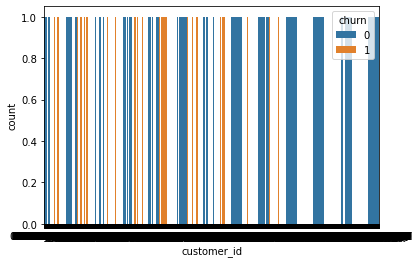

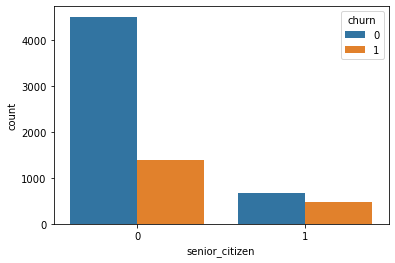

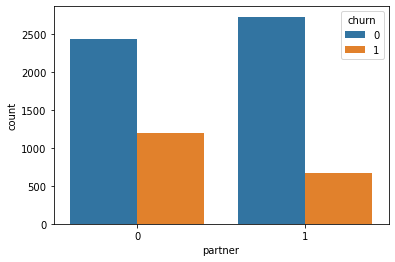

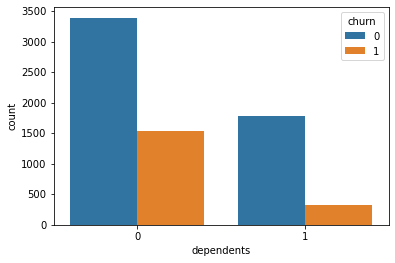

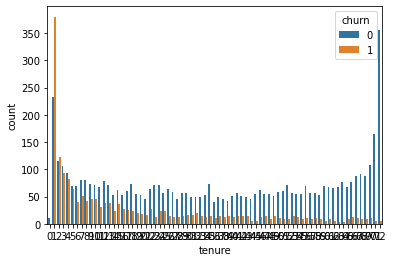

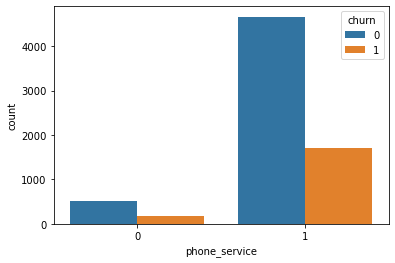

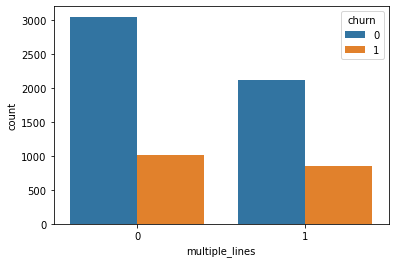

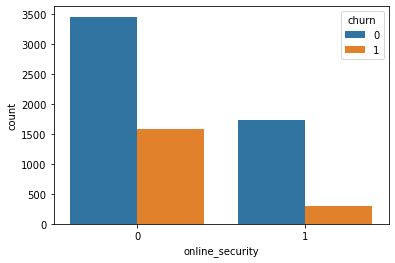

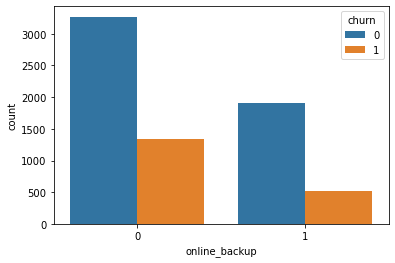

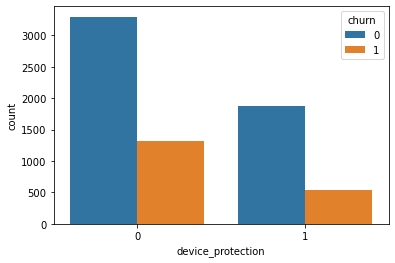

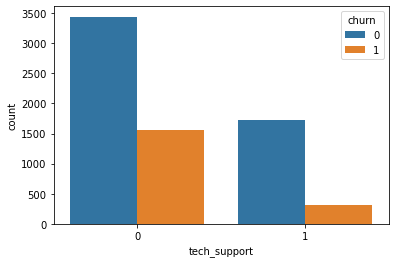

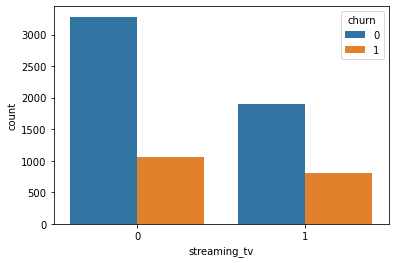

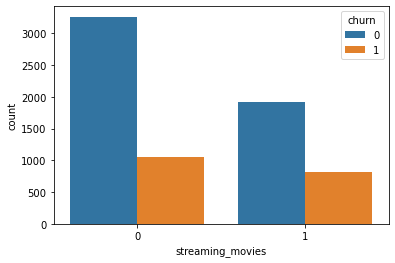

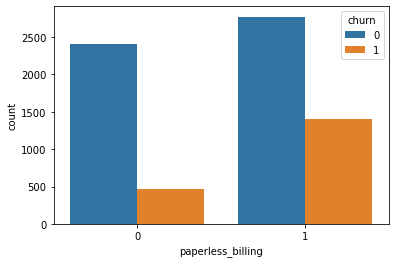

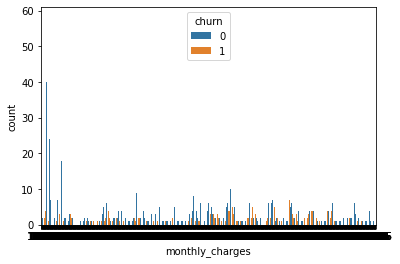

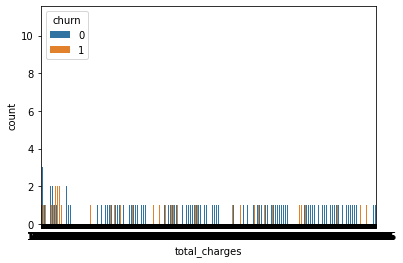

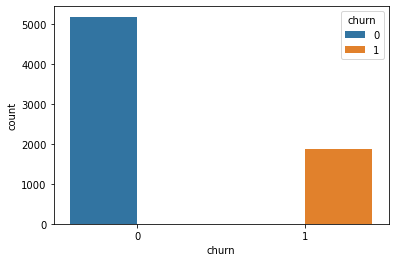

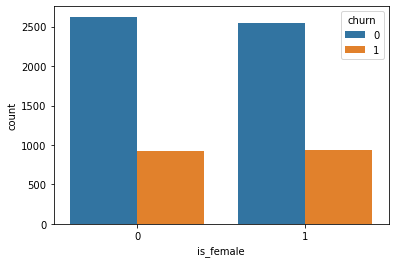

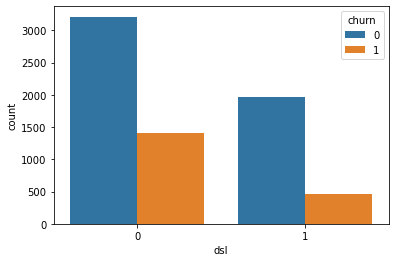

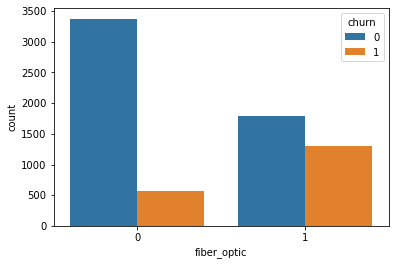

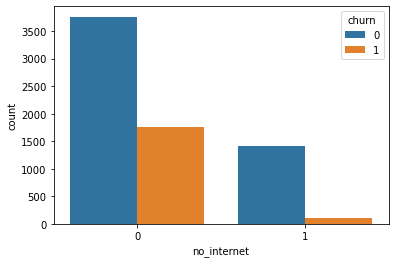

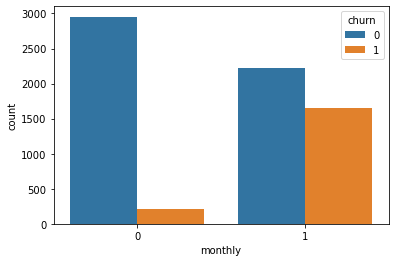

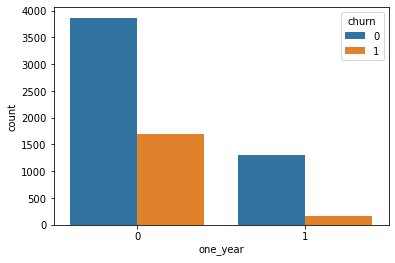

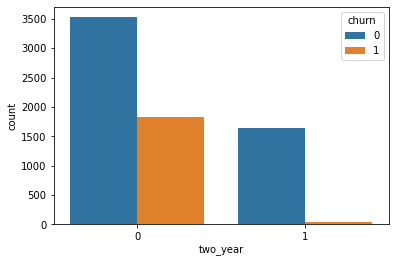

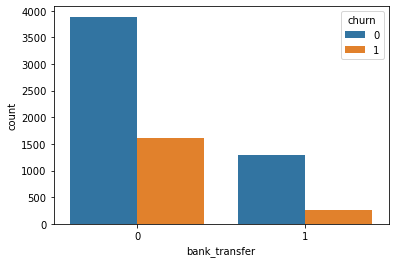

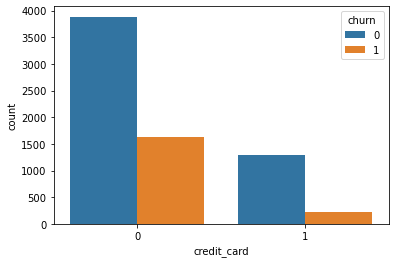

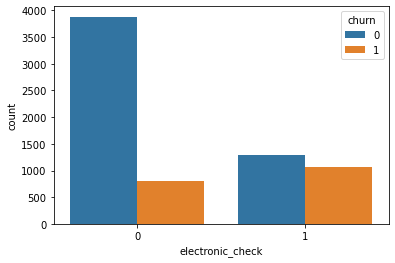

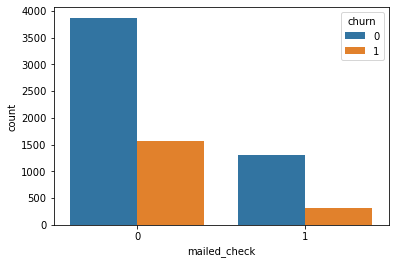

In [9]:
countplot(df)

In [11]:
def get_obj_stats(df):
    for i in obj_vars:
        sns.countplot(data=df, hue=i , x = target) 
        plt.show()

In [ ]:
get_obj_stats(df)

In [10]:
df.sample(50)
df.churn.value_counts()

0    5174
1    1869
Name: churn, dtype: int64